In [1]:
import os
from collections import Counter

path = "pollen"

# This will extract the first part of the filename before "_" and count occurrences
names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(path)]
classes = Counter(names)

print(classes)


Counter({'arecaceae': 35, 'arrabidaea': 35, 'cecropia': 35, 'chromolaena': 35, 'combretum': 35, 'croton': 35, 'dipteryx': 35, 'eucalipto': 35, 'faramea': 35, 'hyptis': 35, 'mabea': 35, 'matayba': 35, 'mimosa': 35, 'myrcia': 35, 'protium': 35, 'qualea': 35, 'schinus': 35, 'senegalia': 35, 'serjania': 35, 'syagrus': 35, 'tridax': 35, 'urochloa': 35, 'anadenanthera': 20})


In [2]:
path = "pollen"
names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(path)]
classes = Counter(names) #returns dictionary

In [3]:
 #Total no.of images
print("number of images:",len(names))


number of images: 790


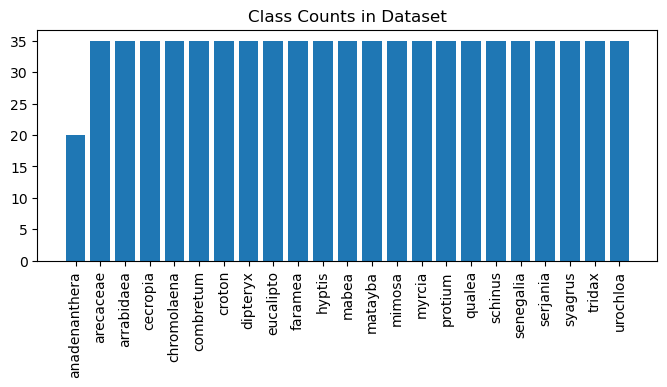

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.title('Class Counts in Dataset')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation='vertical')
plt.show()

In [5]:
path_class = {key: [] for key in classes.keys()}
for name in os.listdir(path):
    key = name.replace(' ', '_').split('_')[0] 
    path_class[key].append(path + name)

In [6]:
import os
from collections import Counter

path = "pollen"

# Extract class names from filenames (before first '_')
names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]

# Count occurrences of each class
classes = Counter(names)


In [7]:
path_class = {key: [] for key in classes.keys()}
for name in os.listdir(path):
    key = name.replace(' ', '_').split('_')[0] 
    path_class[key].append(path + name)

In [9]:
# Initialize dictionary with class names as keys
path_class = {key: [] for key in classes.keys()}

# Group file names by class
for name in os.listdir(path):
    key = name.replace(' ', '_').split('_')[0]
    path_class[key].append(name)

# View sample structure
print(path_class)


{'anadenanthera': ['anadenanthera_16.jpg', 'anadenanthera_17.jpg', 'anadenanthera_18.jpg', 'anadenanthera_19.jpg', 'anadenanthera_20.jpg', 'anadenanthera_21.jpg', 'anadenanthera_22.jpg', 'anadenanthera_23.jpg', 'anadenanthera_24.jpg', 'anadenanthera_25.jpg', 'anadenanthera_26.jpg', 'anadenanthera_27.jpg', 'anadenanthera_28.jpg', 'anadenanthera_29.jpg', 'anadenanthera_30.jpg', 'anadenanthera_31.jpg', 'anadenanthera_32.jpg', 'anadenanthera_33.jpg', 'anadenanthera_34.jpg', 'anadenanthera_35.jpg'], 'arecaceae': ['arecaceae_01.jpg', 'arecaceae_02.jpg', 'arecaceae_03.jpg', 'arecaceae_04.jpg', 'arecaceae_05.jpg', 'arecaceae_06.jpg', 'arecaceae_07.jpg', 'arecaceae_08.jpg', 'arecaceae_09.jpg', 'arecaceae_10.jpg', 'arecaceae_11.jpg', 'arecaceae_12.jpg', 'arecaceae_13.jpg', 'arecaceae_14.jpg', 'arecaceae_15.jpg', 'arecaceae_16.jpg', 'arecaceae_17.jpg', 'arecaceae_18.jpg', 'arecaceae_19.jpg', 'arecaceae_20.jpg', 'arecaceae_21.jpg', 'arecaceae_22.jpg', 'arecaceae_23.jpg', 'arecaceae_24.jpg', 'areca

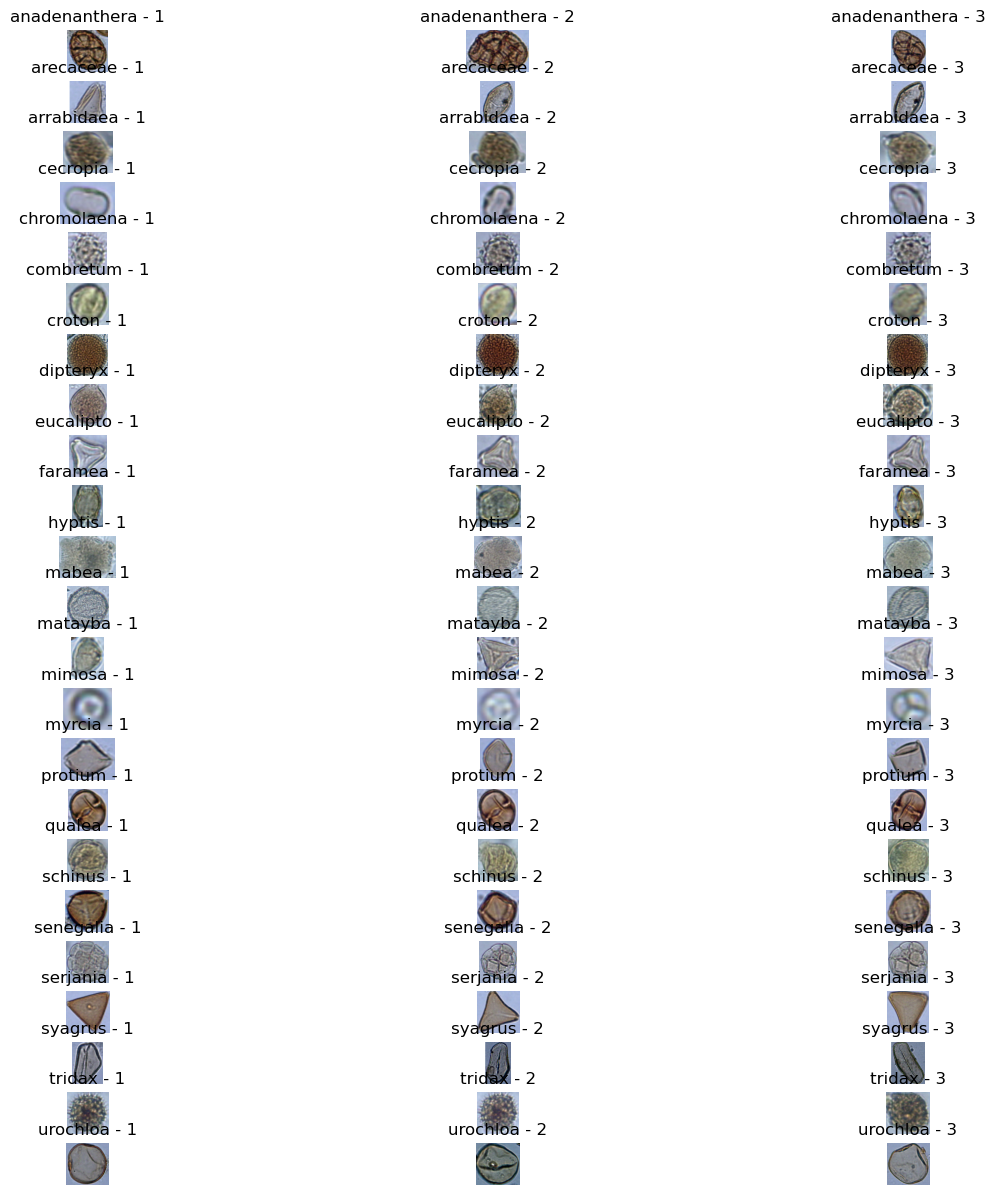

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))

for i, key in enumerate(path_class.keys()):
    try:
        img1 = Image.open(os.path.join(path, path_class[key][0]))
        img2 = Image.open(os.path.join(path, path_class[key][1]))
        img3 = Image.open(os.path.join(path, path_class[key][2]))

        ax = fig.add_subplot(len(path_class), 3, i * 3 + 1)
        ax.imshow(img1)
        ax.set_title(f"{key} - 1")
        ax.axis('off')

        ax = fig.add_subplot(len(path_class), 3, i * 3 + 2)
        ax.imshow(img2)
        ax.set_title(f"{key} - 2")
        ax.axis('off')

        ax = fig.add_subplot(len(path_class), 3, i * 3 + 3)
        ax.imshow(img3)
        ax.set_title(f"{key} - 3")
        ax.axis('off')

    except (IndexError, FileNotFoundError) as e:
        print(f"Skipping class '{key}' due to error: {e}")


In [13]:
import os
import cv2
size =[cv2.imread(path + name). shape for name in os.listdir(path)] 
X, Y,_ = zip(*size)
fig = plt.figure(figsize=(5, 5))
# scatter plot 
plt.scatter(x,y)
plt.title("Image size scatterplot")
# add diagonal red Line 
plt.plot([0,800], [0,800], 'r')

ModuleNotFoundError: No module named 'cv2'

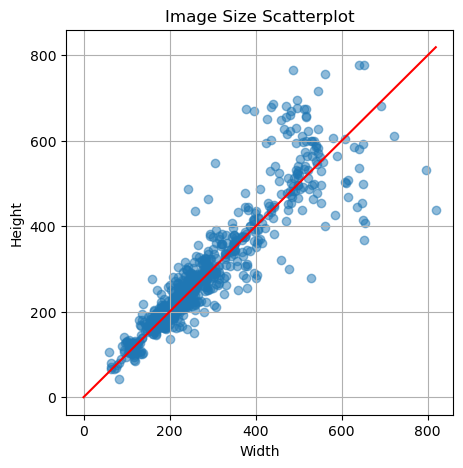

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

path = "pollen"

# Collect image sizes using PIL (width, height)
size = []
for name in os.listdir(path):
    img_path = os.path.join(path, name)
    try:
        with Image.open(img_path) as img:
            size.append(img.size)  # (width, height)
    except:
        print(f"Skipped: {img_path}")

# Unpack width and height
X, Y = zip(*size)

# Plot
fig = plt.figure(figsize=(5, 5))
plt.scatter(X, Y, alpha=0.5)
plt.title("Image Size Scatterplot")
plt.xlabel("Width")
plt.ylabel("Height")

# Diagonal red line (perfect square images)
max_dim = max(max(X), max(Y), 800)  # Adjust line length
plt.plot([0, max_dim], [0, max_dim], 'r')

plt.grid(True)
plt.show()


In [2]:
from PIL import Image
import numpy as np

def process_img(img_path, size=(128, 128)):
    img = Image.open(img_path).convert('RGB')   # Ensure 3 channels (RGB)
    img = img.resize(size)
    img = np.array(img) / 255.0                 # Normalize pixel values
    return img


In [3]:
import os

X, Y = [], []

for name in os.listdir(path):
    full_path = os.path.join(path, name)
    try:
        img = process_img(full_path)
        X.append(img)
        Y.append(name.replace(' ', '_').split('_')[0])
    except:
        print(f"Skipped: {name}")

X = np.array(X)


In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode string class labels
le = LabelEncoder()
Y_le = le.fit_transform(Y)

# One-hot encode using NumPy
def to_categorical_numpy(y, num_classes):
    return np.eye(num_classes)[y]

Y_cat = to_categorical_numpy(Y_le, len(np.unique(Y_le)))


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_cat, test_size=0.285, stratify=Y_le)

print("Images in each class in Test set: {}".format(np.sum(Y_test, axis=0)))


Images in each class in Test set: [ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [14]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
Using cac

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [19]:
from tensorflow.keras.layers import Dropout
input_shape=X_train[0].shape
output_shape = 23
model = Sequential()
model.add(Conv2D (filters = 16, kernel_size =3, input_shape = input_shape, activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
          
model.add(Conv2D (filters= 32, kernel_size= 2, activation ='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=2))
          
model.add(Conv2D (filters = 64, kernel_size = 2, activation= 'relu', padding='same')) 
model.add(MaxPooling2D(pool_size=2))
          
model.add(Conv2D (filters = 128, kernel_size = 2, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
          
model.add(Dropout (0.2))
model.add(Dense (500, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense (150, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(output_shape, activation = 'softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,803 (16.09 MB)

 Trainable params: 4,218,803 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy']) 
print('Model is Compiled!')

Model is Compiled!


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagener = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Fit the data generator (required for normalization/whitening — optional for basic augmentations)
datagener.fit(X_train)


In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size = 4 
epochs = 500

model_path = 'cnn.hdf5'
callbecks = [EarlyStopping (monitor = 'val_loss', patience = 20), ModelCheckpoint (filepath = model_path, save_best_only = True)]

history = model.fit(datagener.flow(X_train, Y_train, batch_size=batch_size), batch_size = batch_size,
                    steps_per_epoch = len(X_train) // batch_size,
                    epochs =epochs,
                    validation_data = (X_train, Y_train),
                    callbacks = callbecks,
                    verbose= 1)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=cnn.hdf5

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size = 32
epochs = 500
model_path = 'cnn.keras'  # ✅ changed from .hdf5

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20),
    ModelCheckpoint(filepath=model_path, save_best_only=True)
]

history = model.fit(
    datagener.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_train, Y_train),  # optional: use (X_val, Y_val)
    callbacks=callbacks,
    verbose=1
)


C:\Users\Dhanesh\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.0452 - loss: 3.2181 - val_accuracy: 0.0443 - val_loss: 3.1317
Epoch 2/500
 1/17 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.0625 - loss: 3.1399

C:\Users\Dhanesh\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0625 - loss: 3.1399 - val_accuracy: 0.0816 - val_loss: 3.1313
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.0602 - loss: 3.1307 - val_accuracy: 0.0833 - val_loss: 3.1084
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.0938 - loss: 3.0996 - val_accuracy: 0.1259 - val_loss: 3.0934
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.0764 - loss: 3.0936 - val_accuracy: 0.0479 - val_loss: 3.2367
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 3.2051 - val_accuracy: 0.0922 - val_loss: 2.9891
Epoch 7/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.0990 - loss: 2.9260 - val_accuracy: 0.0904 - val_loss: 2.9230
Epoch 8/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1562 - loss: 2.8605 - val_accuracy: 0.1064 - val_loss: 2.7616
Epoch 9/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.0893 - loss: 2.7728 - val_accuracy: 0.0780

In [29]:
model.load_weights (model_path)
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test set accuracy: {}'.format(score[1]))

Test set accuracy: 0.8274336457252502


In [30]:
ModelCheckpoint(filepath='cnn.h5', save_best_only=True, save_format='h5')


TypeError: ModelCheckpoint.__init__() got an unexpected keyword argument 'save_format'

In [31]:
from sklearn.model_selection import train_test_split

# 20% of data used for validation
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_cat, test_size=0.2, stratify=Y_le)


In [32]:
history = model.fit(
    datagener.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_val, Y_val),  # ✅ Now using actual validation data
    callbacks=callbacks,
    verbose=1
)


C:\Users\Dhanesh\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.8083 - loss: 0.5564 - val_accuracy: 0.8101 - val_loss: 0.5029
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.7819 - val_accuracy: 0.8544 - val_loss: 0.4170
Epoch 3/500


C:\Users\Dhanesh\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.7684 - loss: 0.5887 - val_accuracy: 0.8924 - val_loss: 0.3579
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8125 - loss: 0.5425 - val_accuracy: 0.8291 - val_loss: 0.4921
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7660 - loss: 0.7277 - val_accuracy: 0.8418 - val_loss: 0.3987
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.7111 - val_accuracy: 0.8165 - val_loss: 0.5261
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.7789 - loss: 0.6662 - val_accuracy: 0.8354 - val_loss: 0.5048
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8125 - loss: 0.5912 - val_accuracy: 0.8734 - val_loss: 0.4069
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.8194 - loss: 0.5078 - val_accuracy: 0.8291 - val_loss: 0.4764
Epoch 10/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8438 - loss: 0.4832 - val_accuracy: 0.8101 - val_

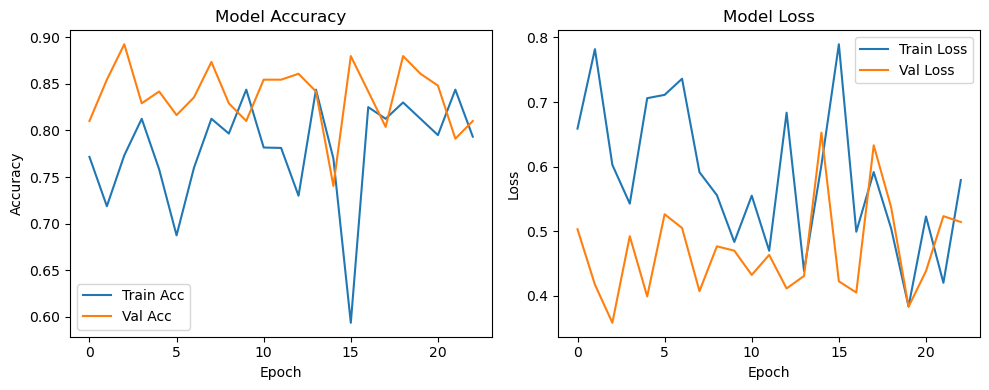

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
model.save('final_pollen_model.h5')

In [35]:
model.save('final_pollen_model.keras')


In [36]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('final_pollen_model.keras')


In [37]:
from PIL import Image
import numpy as np

def predict_image(img_path):
    img = Image.open(img_path).convert('RGB').resize((128, 128))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = le.inverse_transform([class_index])[0]  # Use same label encoder used during training
    return class_label


In [40]:
print(predict_image("pollen/anadenanthera_16.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
anadenanthera


In [41]:
# Split some test data before training, or use what you held out
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y_cat, test_size=0.2, stratify=Y_le, random_state=42)


In [42]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.2%}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8859 - loss: 0.4264
Test Accuracy: 86.08%


In [43]:
pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(Y_test, axis=1)

# Decode to class names
pred_class_names = le.inverse_transform(pred_labels)
true_class_names = le.inverse_transform(true_labels)

# Example: compare first 5 predictions
for i in range(5):
    print(f"Predicted: {pred_class_names[i]}, Actual: {true_class_names[i]}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted: cecropia, Actual: cecropia
Predicted: protium, Actual: protium
Predicted: tridax, Actual: tridax
Predicted: cecropia, Actual: cecropia
Predicted: hyptis, Actual: dipteryx


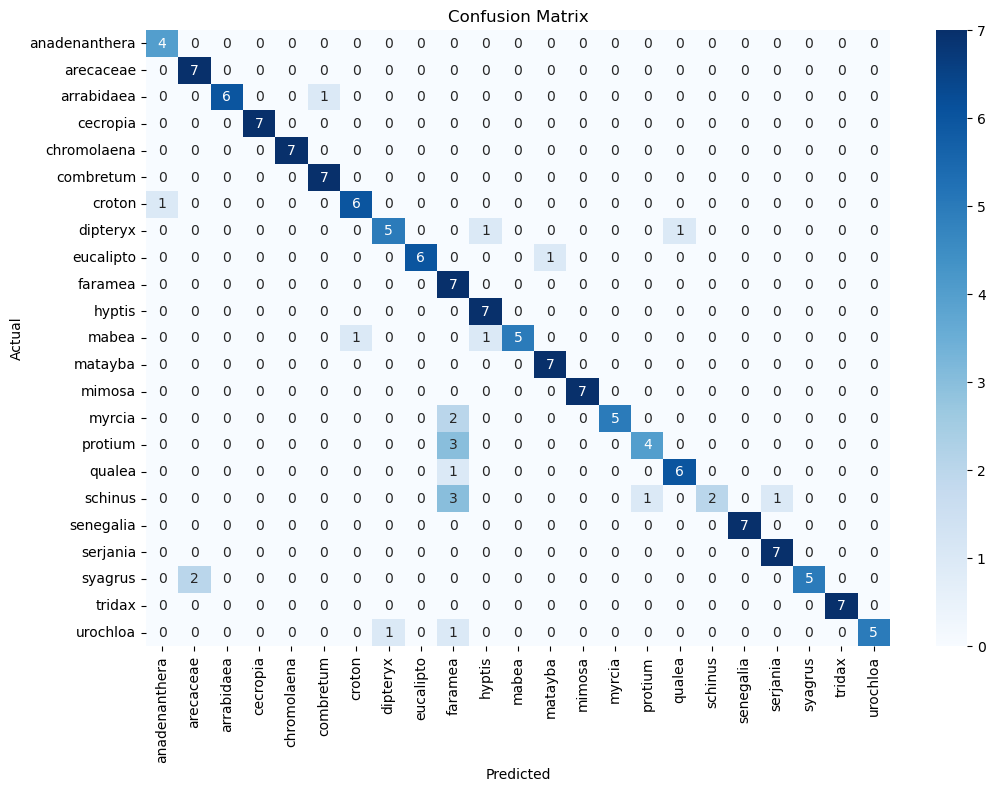

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
